In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
date_cols = [
    'Auftragseingang', 
    'Auftragsende_SOLL',
    'AFO_Start_SOLL',
    'AFO_Ende_SOLL',
    'AFO_Start_IST',
    'AFO_Ende_IST'
]

data = pd.read_csv(
    '../data/processed/data_feature_zeit_3_gesamt.csv',
    parse_dates=date_cols,
    sep=',',
    low_memory=False
)

In [44]:
data.describe()

,BauteilID,Auftragseingang,Priorität,Auftragsende_SOLL,Arbeitsschritt,AFO_Start_SOLL,AFO_Ende_SOLL,AFO_Start_IST,AFO_Ende_IST,MaschinenID,...,Auftrags_Laufzeit_Abweichung_Tage,Wartezeit_vor_Beginn_Tage,Pufferzeit_geplant_Tage,AFO_Start_Wochentag_Num,AFO_Start_Stunde,AFO_Kalenderwoche,AFO_Jahr,AFO_Ende_Stunde,Lieferabweichung_Stunden,Maschinenkapazität_relativ
count,1.528238e+06,1528238,1.528238e+06,1528238,1.528238e+06,1528238,1528238,1528238,1528238,538654.000000,...,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,1.528238e+06,538654.000000
mean,1.630314e+00,2018-11-10 17:44:39.287912448,1.405400e+00,2019-02-11 18:58:59.749673216,1.509230e+02,2019-02-10 17:21:38.321779712,2019-02-10 21:10:02.713203200,2019-04-03 23:26:54.162532608,2019-04-04 02:01:31.282497024,2.388884,...,1.672399e+02,1.442377e+02,9.198402e+01,2.169434e+00,9.685635e+00,2.602437e+01,2.018765e+03,9.855996e+00,1.231042e+03,0.803116
min,1.000000e+00,2000-01-01 00:00:00,1.000000e+00,2013-05-30 09:02:00,1.000000e+00,2013-05-30 08:31:00,2013-05-30 09:01:00,2014-01-01 07:00:00,2014-01-01 07:01:00,1.000000,...,-1.294514e+01,1.291667e+00,1.291667e+00,0.000000e+00,7.000000e+00,1.000000e+00,2.014000e+03,7.000000e+00,-3.381833e+02,0.040000
25%,1.000000e+00,2016-03-08 00:00:00,1.000000e+00,2016-06-14 10:12:00,2.200000e+01,2016-06-13 12:11:00,2016-06-13 13:12:00,2016-08-02 07:01:00,2016-08-02 07:31:00,1.000000,...,2.486111e-01,5.850764e+01,4.629236e+01,1.000000e+00,7.000000e+00,1.300000e+01,2.016000e+03,7.000000e+00,-2.121667e+01,0.560000
50%,2.000000e+00,2018-10-11 00:00:00,1.000000e+00,2019-01-04 11:02:00,1.000000e+02,2019-01-02 07:31:00,2019-01-02 13:42:00,2019-03-14 10:00:00,2019-03-14 10:43:00,2.000000,...,2.208938e+02,1.143917e+02,9.045903e+01,2.000000e+00,9.000000e+00,2.600000e+01,2.019000e+03,1.000000e+01,-1.366667e+00,1.000000
75%,2.000000e+00,2021-06-10 00:00:00,2.000000e+00,2021-09-07 10:12:00,1.000000e+02,2021-09-06 14:21:00,2021-09-07 07:01:00,2021-11-12 09:37:30,2021-11-12 10:16:45,3.000000,...,2.950792e+02,1.685486e+02,1.354729e+02,3.000000e+00,1.200000e+01,3.900000e+01,2.021000e+03,1.200000e+01,4.783333e+01,1.000000
max,3.000000e+00,2024-08-01 00:00:00,3.000000e+00,2024-08-05 07:22:00,9.990000e+02,2024-08-02 14:31:00,2024-08-02 14:32:00,2024-08-02 14:49:00,2024-08-02 15:00:00,5.000000,...,4.178646e+02,8.979367e+03,8.973369e+03,4.000000e+00,1.500000e+01,5.300000e+01,2.024000e+03,1.500000e+01,1.002875e+04,1.000000
std,5.469001e-01,NaN,6.667985e-01,NaN,2.801966e+02,NaN,NaN,NaN,NaN,1.112545,...,1.383522e+02,1.508812e+02,1.068315e+02,1.306972e+00,2.381730e+00,1.494090e+01,3.072861e+00,2.356657e+00,2.570021e+03,0.275453


In [6]:
data["Wochentag"] = data["AFO_Start_IST"].dt.day_name()
wochentag_dauer = data.groupby("Wochentag")["AFO_Dauer_IST_Stunden"].mean().sort_values(ascending=False)

print(wochentag_dauer)

Wochentag
Monday       1.987237
Tuesday      0.676714
Thursday     0.669320
Wednesday    0.668676
Friday       0.663592
Name: AFO_Dauer_IST_Stunden, dtype: float64


In [ ]:
# Durchschnitt pro Tag und Arbeitsschritt
dauer_pro_tag_schritt_mean = (
    data.groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

# Arbeitsschritt mit der höchsten durchschnittlichen Dauer pro Tag
max_mean_schritt_pro_tag = (
    dauer_pro_tag_schritt_mean
    .loc[dauer_pro_tag_schritt_mean.groupby("Wochentag")["AFO_Dauer_IST_Stunden"].idxmax()]
    .sort_values(by="AFO_Dauer_IST_Stunden", ascending=False)
)

print(max_mean_schritt_pro_tag)


    Wochentag Arbeitsschrittbezeichnung  AFO_Dauer_IST_Stunden
25     Monday       manuelle Nacharbeit               3.972513
38   Thursday       manuelle Nacharbeit               2.105435
12     Friday       manuelle Nacharbeit               2.100637
51    Tuesday       manuelle Nacharbeit               2.075077
64  Wednesday       manuelle Nacharbeit               2.069515


In [ ]:
verzoegerung_schritt = (
    data.groupby(["BauteilID", "Arbeitsschrittbezeichnung"])["AFO_Verspätung_Arbeitszeit"]
    .sum()
    .reset_index()
    .sort_values(by=["BauteilID", "AFO_Verspätung_Arbeitszeit"], ascending=[True, False])
)
verzoegerung_schritt

    BauteilID Arbeitsschrittbezeichnung  AFO_Verspätung_Arbeitszeit  \
5           1                 Transport                6.346825e+04   
4           1                 Schweißen                3.051968e+04   
6           1       manuelle Nacharbeit                2.025355e+04   
1           1          Heften-Schweißen                2.751683e+03   
0           1                       End                1.882672e-11   
2           1                      Info                0.000000e+00   
3           1             Nachschweißen               -3.275429e+05   
13          2                 Transport                7.342883e+04   
8           2                Aufspannen                5.703508e+04   
11          2     Mechanisch Bearbeiten                2.755283e+04   
9           2                       End                2.219114e-11   
10          2                      Info                0.000000e+00   
12          2                   Richten               -2.969437e+05   
7     

In [20]:
# Gruppierung
maschine_bauteil_schritt = (
    data.groupby(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "Maschinenbezeichnung"])
    .size()
    .reset_index(name="anzahl_vorkommen")
    .sort_values(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "anzahl_vorkommen"], ascending=[True, True, False])
)

maschine_bauteil_schritt

,Bauteilbezeichnung,Arbeitsschrittbezeichnung,Maschinenbezeichnung,anzahl_vorkommen
0,Daempfungseinheit,End,Keine Maschine,6890
1,Daempfungseinheit,Info,Keine Maschine,6888
2,Daempfungseinheit,Lackieren,Fronius,6890
3,Daempfungseinheit,Transport,Keine Maschine,20672
4,Daempfungseinheit,Verputzen-Aufspannen,DMG Mori,6892
5,Daempfungseinheit,manuelle Nacharbeit,Fronius,2262
6,Schwenkzylinder,Abspannen-Nacharbeiten,Deckel Maho,76356
7,Schwenkzylinder,Aufspannen,EWM,71967
8,Schwenkzylinder,Aufspannen,Lorch,7157
9,Schwenkzylinder,End,Keine Maschine,76366


In [23]:
# Sicherstellen, dass leere Maschinenbezeichnungen als 'Keine Maschine' markiert sind
data["Maschinenbezeichnung"] = data["Maschinenbezeichnung"].fillna("Keine Maschine")

maschine_bauteil_schritt = (
    data.groupby(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "Maschinenbezeichnung"])
    .agg(
        anzahl_vorkommen=("AuftragsID", "count"),  # oder .size()
        AFO_Verspätung_Arbeitszeit_mean=("AFO_Verspätung_Arbeitszeit", "mean"),
        AFO_Verspätung_Arbeitszeit_sum=("AFO_Verspätung_Arbeitszeit", "sum"),
        AFO_DAUER_MEAN=("AFO_Dauer_IST_Stunden", "mean"),
        AFO_DAUER_SUM=("AFO_Dauer_IST_Stunden", "sum")
    )
    .reset_index()
    .sort_values(
        ["Bauteilbezeichnung", "Arbeitsschrittbezeichnung", "anzahl_vorkommen"],
        ascending=[True, True, False]
    )
)
maschine_bauteil_schritt

,Bauteilbezeichnung,Arbeitsschrittbezeichnung,Maschinenbezeichnung,anzahl_vorkommen,AFO_Verspätung_Arbeitszeit_mean,AFO_Verspätung_Arbeitszeit_sum,AFO_DAUER_MEAN,AFO_DAUER_SUM
0,Daempfungseinheit,End,Keine Maschine,6890,5.031292e-16,3.466560e-12,0.016667,114.833333
1,Daempfungseinheit,Info,Keine Maschine,6888,0.000000e+00,0.000000e+00,0.016667,114.800000
2,Daempfungseinheit,Lackieren,Fronius,6890,4.114296e-01,2.834750e+03,1.244908,8577.416667
3,Daempfungseinheit,Transport,Keine Maschine,20672,2.280089e-01,4.713400e+03,0.728009,15049.400000
4,Daempfungseinheit,Verputzen-Aufspannen,DMG Mori,6892,-2.349509e+00,-1.619282e+04,1.338970,9228.183333
5,Daempfungseinheit,manuelle Nacharbeit,Fronius,2262,3.352350e+00,7.583017e+03,3.369017,7620.716667
6,Schwenkzylinder,Abspannen-Nacharbeiten,Deckel Maho,76356,-4.107145e+00,-3.136052e+05,1.258635,96104.350000
7,Schwenkzylinder,Aufspannen,EWM,71967,2.320469e-01,1.669972e+04,1.199467,86322.050000
8,Schwenkzylinder,Aufspannen,Lorch,7157,5.635792e+00,4.033537e+04,6.589428,47160.533333
9,Schwenkzylinder,End,Keine Maschine,76366,2.905892e-16,2.219114e-11,0.016667,1272.766667


In [16]:
# Relevante Bauteile und Arbeitsschritte definieren
bedingungen = (
    ((data["BauteilID"].isin([1, 3])) & (data["Arbeitsschrittbezeichnung"] == "Manuelle Nacharbeit"))
    | ((data["BauteilID"] == 2) & (data["Arbeitsschrittbezeichnung"] == "Aufspannen"))
)

# Nur relevante Zeilen
df_filter = data[bedingungen]

# Anzahl dieser Arbeitsschritte pro Auftrag und Bauteil
anzahl_pro_auftrag = (
    df_filter.groupby(["BauteilID", "AuftragsID"])["Arbeitsschrittbezeichnung"]
    .count()
    .reset_index(name="Anzahl_Schritte")
)

# Durchschnittliche Häufigkeit pro Bauteil
durchschnitt_pro_bauteil = (
    anzahl_pro_auftrag.groupby("BauteilID")["Anzahl_Schritte"]
    .mean()
    .reset_index(name="Durchschnittliche_Häufigkeit_pro_Auftrag")
)

print(durchschnitt_pro_bauteil)


   BauteilID  Durchschnittliche_Häufigkeit_pro_Auftrag
0          2                                       1.0


In [17]:
# Gesamtanzahl Zeilen pro Bauteil
gesamt = data.groupby("BauteilID")["Arbeitsschrittbezeichnung"].count().rename("Gesamt").reset_index()

# Vorkommen der interessanten Arbeitsschritte
interessant = data[
    ((data["BauteilID"].isin([1, 3])) & (data["Arbeitsschrittbezeichnung"] == "Manuelle Nacharbeit"))
    | ((data["BauteilID"] == 2) & (data["Arbeitsschrittbezeichnung"] == "Aufspannen"))
].groupby("BauteilID")["Arbeitsschrittbezeichnung"].count().rename("Treffer").reset_index()

# Zusammenführen und Anteil berechnen
ergebnis = gesamt.merge(interessant, on="BauteilID", how="left").fillna(0)
ergebnis["Anteil (%)"] = ergebnis["Treffer"] / ergebnis["Gesamt"] * 100

print(ergebnis)


   BauteilID  Gesamt  Treffer  Anteil (%)
0          1  615462      0.0    0.000000
1          2  862282  79124.0    9.176116
2          3   50494      0.0    0.000000


In [11]:
dauer_pro_bauteil = (
    data.groupby("Bauteilbezeichnung")["AFO_Verspätung_Arbeitszeit"]
    .mean()
    .reset_index()
    .sort_values(by="AFO_Verspätung_Arbeitszeit", ascending=False)
)

print(dauer_pro_bauteil)

  Bauteilbezeichnung  AFO_Verspätung_Arbeitszeit
0  Daempfungseinheit                   -0.021025
2  Steuerventilmodul                   -0.342100
1    Schwenkzylinder                   -0.524807


In [ ]:
# Gruppierung nach Wochentag und Arbeitsschritt
dauer_pro_tag_schritt = (
    data.groupby(["Wochentag", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

# Sortieren: erst nach Wochentag, dann absteigend nach Dauer
dauer_pro_tag_schritt = dauer_pro_tag_schritt.sort_values(
    by=["Wochentag", "AFO_Dauer_IST_Stunden"],
    ascending=[True, False]
)

top10_je_tag = (
    dauer_pro_tag_schritt.groupby("Wochentag")
    .head(10)
    .reset_index(drop=True)
)

print(top10_je_tag)



    Wochentag Arbeitsschrittbezeichnung  AFO_Dauer_IST_Stunden
0      Friday       manuelle Nacharbeit               2.100637
1      Friday          Heften-Schweißen               1.578877
2      Friday                Aufspannen               1.542905
3      Friday                 Schweißen               1.084503
4      Friday     Mechanisch Bearbeiten               1.083610
5      Friday                   Richten               1.082936
6      Friday             Nachschweißen               1.082269
7      Friday      Verputzen-Aufspannen               1.082154
8      Friday    Abspannen-Nacharbeiten               1.081469
9      Friday                 Lackieren               1.079189
10     Monday       manuelle Nacharbeit               3.972513
11     Monday                Aufspannen               3.870179
12     Monday          Heften-Schweißen               3.466629
13     Monday      Verputzen-Aufspannen               2.919592
14     Monday             Nachschweißen               2

In [109]:
steps_per_day_order = (
    data.groupby(["Wochentag_End", "AuftragsID"])["Arbeitsschrittbezeichnung"]
    .nunique()  # oder .count(), je nachdem ob du doppelte Schritte pro Auftrag willst
    .reset_index(name="Schritte_Abgeschlossen")
)

# Durchschnittliche Anzahl Schritte pro Auftrag je Wochentag
avg_steps_per_day = (
    steps_per_day_order.groupby("Wochentag_End")["Schritte_Abgeschlossen"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(avg_steps_per_day)

Wochentag_End
Monday       2.469367
Tuesday      3.541138
Wednesday    3.599872
Thursday     3.662570
Friday       3.684293
Name: Schritte_Abgeschlossen, dtype: float64


In [110]:
data["Wochentag_Start"] = data["AFO_Start_IST"].dt.day_name()

steps_per_day_start = (
    data.groupby(["Wochentag_Start", "AuftragsID"])["Arbeitsschrittbezeichnung"]
    .nunique()
    .reset_index(name="Schritte_Gestartet")
)

avg_steps_per_day_start = (
    steps_per_day_start.groupby("Wochentag_Start")["Schritte_Gestartet"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(avg_steps_per_day_start)


Wochentag_Start
Monday       2.513103
Tuesday      3.322394
Wednesday    3.442241
Thursday     3.483982
Friday       3.506477
Name: Schritte_Gestartet, dtype: float64


In [111]:
# Wochentag der Starts bestimmen
data["Wochentag_Start"] = data["AFO_Start_IST"].dt.day_name()

# Maschinenstarts pro Tag und Maschine zählen
machine_activity = (
    data.groupby(["Wochentag_Start", "Maschinenbezeichnung"])["AFO_Start_IST"]
    .count()
    .reset_index(name="Starts")
)

# Durchschnittliche Starts pro Maschine je Wochentag
avg_starts_per_machine = (
    machine_activity.groupby("Wochentag_Start")["Starts"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(avg_starts_per_machine)


Wochentag_Start
Monday       10585.8
Tuesday      26223.6
Wednesday    24846.4
Thursday     23370.4
Friday       22704.6
Name: Starts, dtype: float64


In [113]:
data = data.sort_values(["Maschinenbezeichnung", "AFO_Start_IST"])

data["Prev_End"] = data.groupby("Maschinenbezeichnung")["AFO_Ende_IST"].shift(1)
data["Idle_Time_h"] = (data["AFO_Start_IST"] - data["Prev_End"]).dt.total_seconds() / 3600

idle_by_day = (
    data.groupby("Wochentag_Start")["Idle_Time_h"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(idle_by_day)


Wochentag_Start
Monday      -8.074835
Tuesday     -2.761871
Wednesday   -2.523868
Thursday    -2.465326
Friday      -6.904505
Name: Idle_Time_h, dtype: float64


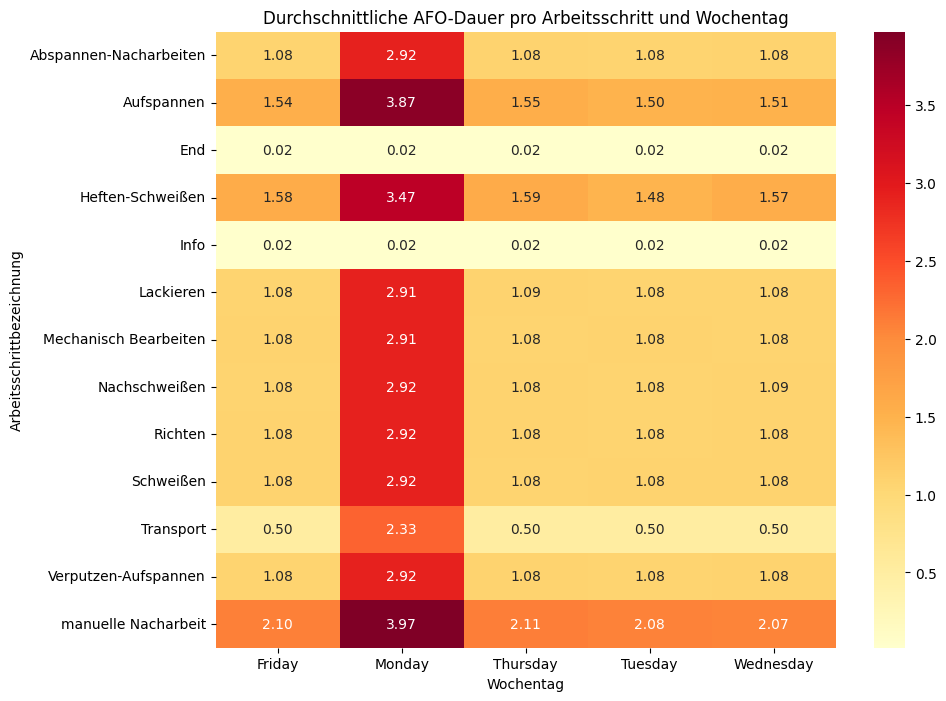

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = dauer_pro_tag_schritt.pivot(
    index="Arbeitsschrittbezeichnung",
    columns="Wochentag",
    values="AFO_Dauer_IST_Stunden"
)

plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Durchschnittliche AFO-Dauer pro Arbeitsschritt und Wochentag")
plt.show()


In [88]:
data["AFO_Start_IST"] = pd.to_datetime(data["AFO_Start_IST"])
data["Start_Stunde"] = data["AFO_Start_IST"].dt.hour + data["AFO_Start_IST"].dt.minute / 60

startzeiten_mean = (
    data.groupby("Wochentag")["Start_Stunde"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(startzeiten_mean)


Wochentag
Monday        9.526927
Tuesday      10.344248
Wednesday    10.082516
Thursday     10.083746
Friday       10.069284
Name: Start_Stunde, dtype: float64


In [89]:
prio_avg = (
    data.groupby("Wochentag")["Priorität"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(prio_avg)

# Option: Anzahl unterschiedlicher Bauteile
bauteile_diversitaet = (
    data.groupby("Wochentag")["Bauteilbezeichnung"]
    .nunique()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(bauteile_diversitaet)


Wochentag
Monday       1.348474
Tuesday      1.496435
Wednesday    1.400802
Thursday     1.366907
Friday       1.376640
Name: Priorität, dtype: float64
Wochentag
Monday       3
Tuesday      3
Wednesday    3
Thursday     3
Friday       3
Name: Bauteilbezeichnung, dtype: int64


In [90]:
effizienz = (
    data.groupby("Wochentag")
    .agg(
        mean_kapazität=("Maschinenkapazität", "mean"),
        mean_dauer=("AFO_Dauer_IST_Stunden", "mean")
    )
)
effizienz["Effizienzindex"] = effizienz["mean_kapazität"] / effizienz["mean_dauer"]
print(effizienz)


           mean_kapazität  mean_dauer  Effizienzindex
Wochentag                                            
Friday          10.535407    0.663592       15.876344
Monday           9.280224    1.987237        4.669913
Thursday        10.490954    0.669320       15.674047
Tuesday         12.949587    0.676714       19.135983
Wednesday       10.752656    0.668676       16.080520


In [91]:
data["Stunde"] = data["AFO_Start_IST"].dt.hour
montag_data = data[data["Wochentag"] == "Monday"]

dauer_nach_stunde = montag_data.groupby("Stunde")["AFO_Dauer_IST_Stunden"].mean()
print(dauer_nach_stunde)


Stunde
7     1.449739
8     3.309911
9     2.496624
10    2.430439
11    2.932448
12    2.273300
13    2.345225
14    2.756578
15    2.443023
Name: AFO_Dauer_IST_Stunden, dtype: float64


In [93]:
# Stunde aus dem Startzeitpunkt ableiten
data["Stunde"] = data["AFO_Start_IST"].dt.hour

# Durchschnittliche AFO-Dauer je Wochentag und Stunde
dauer_pro_tag_stunde = (
    data.groupby(["Wochentag", "Stunde"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

# Wochentage in richtiger Reihenfolge sortieren
tage_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
dauer_pro_tag_stunde["Wochentag"] = pd.Categorical(dauer_pro_tag_stunde["Wochentag"], categories=tage_reihenfolge, ordered=True)

# Nach Tag und Stunde sortieren
dauer_pro_tag_stunde = dauer_pro_tag_stunde.sort_values(["Wochentag", "Stunde"])

print(dauer_pro_tag_stunde)
# Stunde aus dem Startzeitpunkt ableiten
data["Stunde"] = data["AFO_Start_IST"].dt.hour

# Durchschnittliche AFO-Dauer je Wochentag und Stunde
dauer_pro_tag_stunde = (
    data.groupby(["Wochentag", "Stunde"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

# Wochentage in richtiger Reihenfolge sortieren
tage_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
dauer_pro_tag_stunde["Wochentag"] = pd.Categorical(dauer_pro_tag_stunde["Wochentag"], categories=tage_reihenfolge, ordered=True)

# Nach Tag und Stunde sortieren
dauer_pro_tag_stunde = dauer_pro_tag_stunde.sort_values(["Wochentag", "Stunde"])

print(dauer_pro_tag_stunde)


    Wochentag  Stunde  AFO_Dauer_IST_Stunden
9      Monday       7               1.449739
10     Monday       8               3.309911
11     Monday       9               2.496624
12     Monday      10               2.430439
13     Monday      11               2.932448
14     Monday      12               2.273300
15     Monday      13               2.345225
16     Monday      14               2.756578
17     Monday      15               2.443023
27    Tuesday       7               0.409090
28    Tuesday       8               0.759813
29    Tuesday       9               0.781317
30    Tuesday      10               0.777442
31    Tuesday      11               0.749255
32    Tuesday      12               0.726120
33    Tuesday      13               0.733936
34    Tuesday      14               0.745414
35    Tuesday      15               0.791191
36  Wednesday       7               0.460235
37  Wednesday       8               0.748574
38  Wednesday       9               0.780078
39  Wednes

In [95]:
# Gruppierung: Wie oft wird jede Maschine pro Tag verwendet
maschinen_counts = (
    data.groupby(["Wochentag", "Maschinenbezeichnung"])["AuftragsID"]
    .count()
    .reset_index(name="Anzahl_AFOs")
)

maschinen_counts["Anteil_pro_Tag_%"] = (
    maschinen_counts.groupby("Wochentag")["Anzahl_AFOs"]
    .transform(lambda x: 100 * x / x.sum())
)


# Reihenfolge der Wochentage
tage_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
maschinen_counts["Wochentag"] = pd.Categorical(maschinen_counts["Wochentag"], categories=tage_reihenfolge, ordered=True)

maschinen_counts = maschinen_counts.sort_values(["Wochentag", "Anzahl_AFOs"], ascending=[True, False])

print(maschinen_counts)


    Wochentag Maschinenbezeichnung  Anzahl_AFOs  Anteil_pro_Tag_%
7      Monday                  EWM        15180         28.679930
6      Monday          Deckel Maho        13248         25.029757
8      Monday              Fronius        12482         23.582535
5      Monday             DMG Mori         9797         18.509702
9      Monday                Lorch         2222          4.198077
18    Tuesday              Fronius        41850         31.917814
17    Tuesday                  EWM        36689         27.981665
16    Tuesday          Deckel Maho        29530         22.521698
15    Tuesday             DMG Mori        20273         15.461645
19    Tuesday                Lorch         2776          2.117177
23  Wednesday              Fronius        35934         28.924915
21  Wednesday          Deckel Maho        32663         26.291938
22  Wednesday                  EWM        32554         26.204199
20  Wednesday             DMG Mori        20263         16.310612
24  Wednes

In [96]:
maschinen_dauer_tag = (
    data.groupby(["Wochentag", "Maschinenbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

maschinen_dauer_tag["Wochentag"] = pd.Categorical(
    maschinen_dauer_tag["Wochentag"],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
    ordered=True
)

maschinen_dauer_tag = maschinen_dauer_tag.sort_values(["Maschinenbezeichnung", "Wochentag"])
print(maschinen_dauer_tag)


    Wochentag Maschinenbezeichnung  AFO_Dauer_IST_Stunden
5      Monday             DMG Mori               2.918227
15    Tuesday             DMG Mori               1.080549
20  Wednesday             DMG Mori               1.083959
10   Thursday             DMG Mori               1.083784
0      Friday             DMG Mori               1.082868
6      Monday          Deckel Maho               2.917341
16    Tuesday          Deckel Maho               1.082512
21  Wednesday          Deckel Maho               1.084450
11   Thursday          Deckel Maho               1.083589
1      Friday          Deckel Maho               1.081834
7      Monday                  EWM               2.931467
17    Tuesday                  EWM               1.157658
22  Wednesday                  EWM               1.140110
12   Thursday                  EWM               1.137083
2      Friday                  EWM               1.140672
8      Monday              Fronius               2.929198
18    Tuesday 


📊 Stärkste Korrelationen mit AFO_Dauer_IST_Stunden:
AFO_Dauer_IST_Stunden                1.000000
Tag_Monday                           0.473004
Tag_End_Monday                       0.334761
MaschinenID                          0.288074
AFO_Dauer_SOLL_Stunden               0.163922
AFO_Ende_Stunde                      0.144171
Start_Stunde                         0.125180
Stunde                               0.116819
Stunde_Start                         0.116819
AFO_Start_Stunde                     0.116819
AFO_Verspätung_Arbeitszeit           0.094518
Maschinenkapazität_relativ           0.039154
Auftrags_Laufzeit_Abweichung_Tage    0.034289
Auftrags_Laufzeit_IST_Tage           0.034243
Tag_End_Tuesday                      0.022683
Pufferzeit_geplant_Tage              0.005380
AFO_Kalenderwoche                    0.001957
AFO_Jahr                             0.001169
Auftrags_Laufzeit_SOLL_Tage         -0.001839
AFO_Erster_Schritt                  -0.007166
Name: AFO_Dauer_IST_Stunden

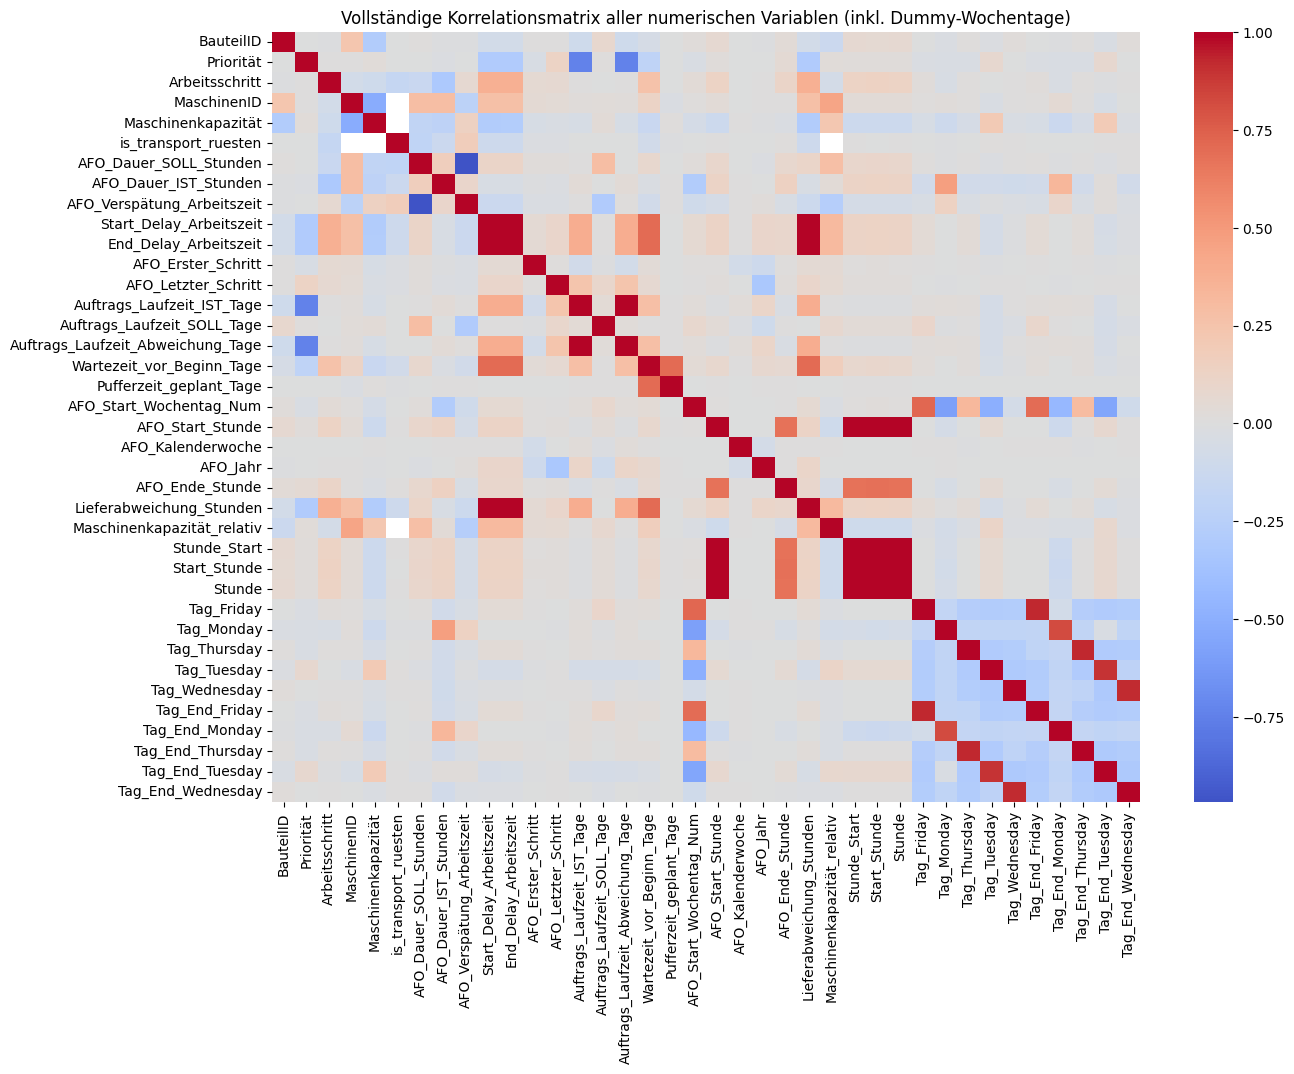

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Dummy-Codierung der Wochentage ---
wochentag_dummies = pd.get_dummies(data["Wochentag"], prefix="Tag")

# --- Dummy-Codierung auch für End-Wochentag (optional, kann spannend sein)
wochentag_end_dummies = pd.get_dummies(data["Wochentag_End"], prefix="Tag_End")

# --- Integration in Haupt-DataFrame ---
df = pd.concat([data, wochentag_dummies, wochentag_end_dummies], axis=1)

# --- Auswahl aller numerischen Spalten ---
numeric_df = df.select_dtypes(include=["int64", "float64", "int32", "bool"]).copy()

# --- (optional) Boolean in 0/1 umwandeln, damit sie in Korrelation eingehen ---
numeric_df = numeric_df.astype(float)

# --- Berechnung der Korrelationsmatrix ---
corr_matrix = numeric_df.corr(method="pearson")

# --- Optional: Nur Spalten anzeigen, die mit AFO_Dauer_IST_Stunden korrelieren ---
dauer_corr = corr_matrix["AFO_Dauer_IST_Stunden"].sort_values(ascending=False)
print("\n📊 Stärkste Korrelationen mit AFO_Dauer_IST_Stunden:")
print(dauer_corr.head(20))
print("\n📉 Schwächste Korrelationen:")
print(dauer_corr.tail(20))

# --- Heatmap plotten ---
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,  # auf True stellen, wenn du Zahlen willst (kann bei vielen Spalten unübersichtlich sein)
)
plt.title("Vollständige Korrelationsmatrix aller numerischen Variablen (inkl. Dummy-Wochentage)")
plt.show()


In [101]:
import pandas as pd

# Sortieren nach Auftrag, Bauteil und tatsächlichem Startzeitpunkt
data_sorted = data.sort_values(by=["AuftragsID", "BauteilID", "AFO_Start_IST"])

# Für jedes Bauteil die Start- und Endzeiten des nächsten Schritts anfügen
data_sorted["Next_Start_IST"] = data_sorted.groupby(["AuftragsID", "BauteilID"])["AFO_Start_IST"].shift(-1)
data_sorted["Current_End_IST"] = data_sorted["AFO_Ende_IST"]

# Zeitdifferenz (in Stunden) zwischen dem Ende des aktuellen und dem Start des nächsten Schritts
data_sorted["Gap_to_next_h"] = (
    (data_sorted["Next_Start_IST"] - data_sorted["Current_End_IST"]).dt.total_seconds() / 3600
)

# Filter: Nur positive Lücken (keine Überlappung)
data_sorted = data_sorted[data_sorted["Gap_to_next_h"] >= 0]

# Wochentag des aktuellen Schritts
data_sorted["Wochentag"] = data_sorted["AFO_Start_IST"].dt.day_name()

# Durchschnittliche Lücke pro Wochentag
avg_gap = (
    data_sorted.groupby("Wochentag")["Gap_to_next_h"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(avg_gap)



Wochentag
Monday       219.971572
Tuesday      481.861820
Wednesday    476.987316
Thursday     462.778128
Friday       445.118178
Name: Gap_to_next_h, dtype: float64


In [106]:
# explizite Binärvariable erstellen
data["is_erste_afo"] = (data["AFO_Erster_Schritt"] == 1).astype(int)

anteil_erste = (
    data.groupby("Wochentag")["is_erste_afo"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(anteil_erste)


Wochentag
Monday       0.991462
Tuesday      0.993233
Wednesday    0.991596
Thursday     0.990396
Friday       0.990042
Name: is_erste_afo, dtype: float64


In [107]:
# Mittelwert der Startverzögerung pro Wochentag
start_delay_per_day = (
    data.groupby("Wochentag")["Start_Delay_Arbeitszeit"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(start_delay_per_day)

Wochentag
Monday       299.887055
Tuesday      228.941003
Wednesday    288.394890
Thursday     338.690313
Friday       353.198501
Name: Start_Delay_Arbeitszeit, dtype: float64


In [108]:
end_delay_per_day = (
    data.groupby("Wochentag")["End_Delay_Arbeitszeit"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(end_delay_per_day)

Wochentag
Monday       300.772893
Tuesday      228.589619
Wednesday    287.939843
Thursday     338.191683
Friday       352.665421
Name: End_Delay_Arbeitszeit, dtype: float64


In [118]:
# Sortieren nach Bauteil und Startzeit
data = data.sort_values(["Bauteilbezeichnung", "AFO_Start_IST"])

# Nächsten Start pro Bauteil berechnen
data["Next_Start_IST"] = data.groupby("Bauteilbezeichnung")["AFO_Start_IST"].shift(-1)

# Differenz in Stunden berechnen
data["Gap_to_next_h"] = (data["Next_Start_IST"] - data["AFO_Ende_IST"]).dt.total_seconds() / 3600


transport = data[data["Arbeitsschrittbezeichnung"].str.contains("Transport", case=False, na=False)]

gap_per_day = (
    transport.groupby("Wochentag")["Gap_to_next_h"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(gap_per_day)


Wochentag
Monday      -4.433270
Tuesday     -1.043718
Wednesday   -1.001321
Thursday    -0.985862
Friday      -2.544616
Name: Gap_to_next_h, dtype: float64


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/3568384083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


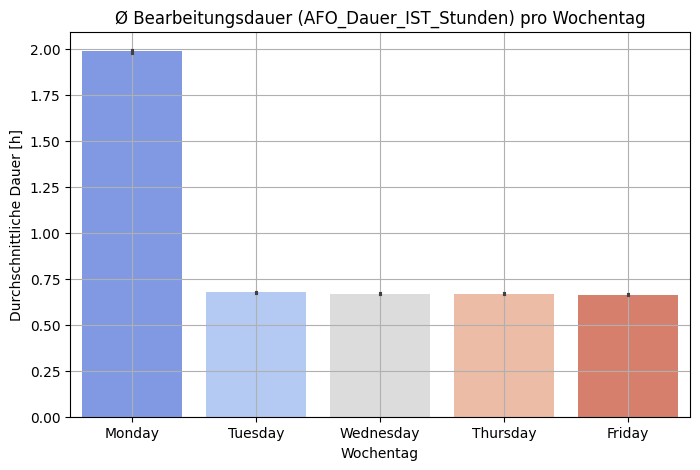

In [119]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=data,
    x="Wochentag",
    y="AFO_Dauer_IST_Stunden",
    order=["Monday","Tuesday","Wednesday","Thursday","Friday"],
    palette="coolwarm"
)
plt.title("Ø Bearbeitungsdauer (AFO_Dauer_IST_Stunden) pro Wochentag")
plt.ylabel("Durchschnittliche Dauer [h]")
plt.xlabel("Wochentag")
plt.grid(True)
plt.show()


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/4231606987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


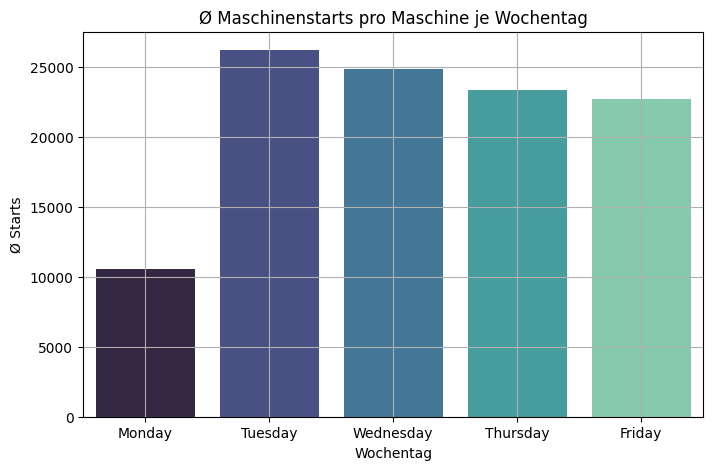

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/4231606987.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


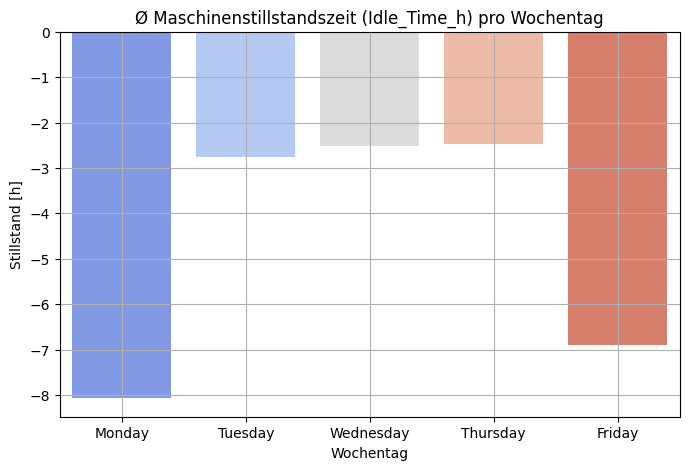

In [120]:
# Maschinenstarts
plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_starts_per_machine.index,
    y=avg_starts_per_machine.values,
    palette="mako"
)
plt.title("Ø Maschinenstarts pro Maschine je Wochentag")
plt.ylabel("Ø Starts")
plt.xlabel("Wochentag")
plt.grid(True)
plt.show()

# Stillstandszeiten (Idle_Time_h)
plt.figure(figsize=(8,5))
sns.barplot(
    x=idle_by_day.index,
    y=idle_by_day.values,
    palette="coolwarm"
)
plt.title("Ø Maschinenstillstandszeit (Idle_Time_h) pro Wochentag")
plt.ylabel("Stillstand [h]")
plt.xlabel("Wochentag")
plt.grid(True)
plt.show()


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/2203781560.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


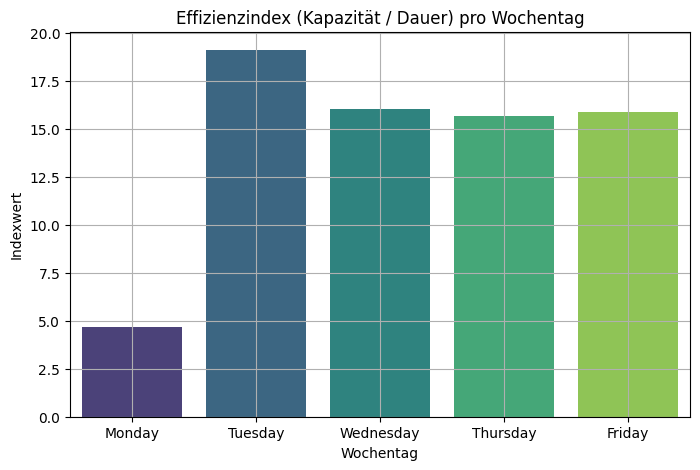

In [122]:
eff_df = pd.DataFrame({
    "Wochentag": ["Monday","Tuesday","Wednesday","Thursday","Friday"],
    "Effizienzindex": [4.67,19.13,16.08,15.67,15.88]
})

plt.figure(figsize=(8,5))
sns.barplot(
    data=eff_df,
    x="Wochentag",
    y="Effizienzindex",
    palette="viridis"
)
plt.title("Effizienzindex (Kapazität / Dauer) pro Wochentag")
plt.ylabel("Indexwert")
plt.xlabel("Wochentag")
plt.grid(True)
plt.show()


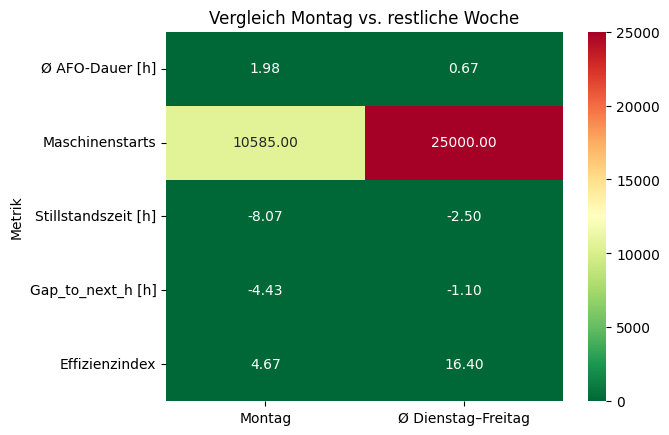

In [125]:
summary = pd.DataFrame({
    "Metrik": [
        "Ø AFO-Dauer [h]",
        "Maschinenstarts",
        "Stillstandszeit [h]",
        "Gap_to_next_h [h]",
        "Effizienzindex"
    ],
    "Montag": [1.98, 10585, -8.07, -4.43, 4.67],
    "Ø Dienstag–Freitag": [0.67, 25000, -2.5, -1.1, 16.4]
})

sns.heatmap(summary.set_index("Metrik").astype(float), annot=True, cmap="RdYlGn_r", fmt=".2f")
plt.title("Vergleich Montag vs. restliche Woche")
plt.show()


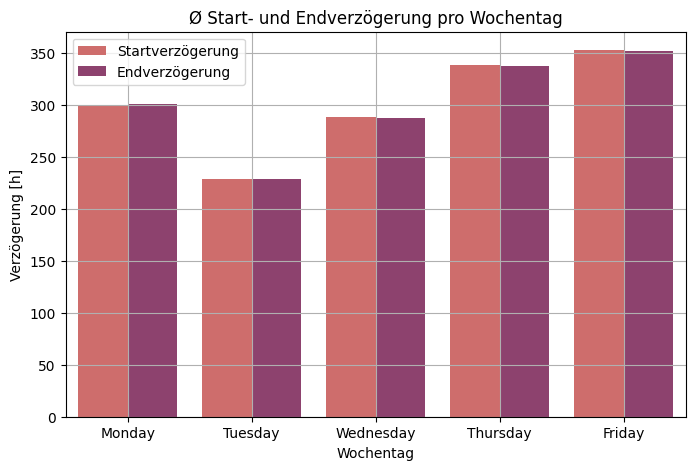

In [121]:
delay_df = pd.DataFrame({
    "Startverzögerung": start_delay_per_day,
    "Endverzögerung": end_delay_per_day
}).reset_index().melt(id_vars="Wochentag", var_name="Typ", value_name="Verzögerung")

plt.figure(figsize=(8,5))
sns.barplot(
    data=delay_df,
    x="Wochentag",
    y="Verzögerung",
    hue="Typ",
    palette="flare",
    order=["Monday","Tuesday","Wednesday","Thursday","Friday"]
)
plt.title("Ø Start- und Endverzögerung pro Wochentag")
plt.ylabel("Verzögerung [h]")
plt.xlabel("Wochentag")
plt.legend(title="")
plt.grid(True)
plt.show()


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 43 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   AuftragsID                         1528238 non-null  object        
 1   BauteilID                          1528238 non-null  int64         
 2   Bauteilbezeichnung                 1528238 non-null  object        
 3   Auftragseingang                    1528238 non-null  datetime64[ns]
 4   Priorität                          1528238 non-null  int64         
 5   Auftragsende_SOLL                  1528238 non-null  datetime64[ns]
 6   Arbeitsschritt                     1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung          1528238 non-null  object        
 8   AFO_Start_SOLL                     1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL                      1528238 non-null  datetime64[ns]
 10  AFO_St

In [92]:
prio_avg = data.groupby("Wochentag")["Priorität"].mean()
bauteile = data.groupby("Wochentag")["Bauteilbezeichnung"].nunique()
print(prio_avg, bauteile)


Wochentag
Friday       1.376640
Monday       1.348474
Thursday     1.366907
Tuesday      1.496435
Wednesday    1.400802
Name: Priorität, dtype: float64 Wochentag
Friday       3
Monday       3
Thursday     3
Tuesday      3
Wednesday    3
Name: Bauteilbezeichnung, dtype: int64


In [78]:
kapazitaet_mean = (
    data.groupby("Wochentag")["Maschinenkapazität"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(kapazitaet_mean)

Wochentag
Monday        9.280224
Tuesday      12.949587
Wednesday    10.752656
Thursday     10.490954
Friday       10.535407
Name: Maschinenkapazität, dtype: float64


In [79]:
# Durchschnittliche Priorität (3 = hoch, 1 = niedrig)
prio_mean = (
    data.groupby("Wochentag")["Priorität"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

# Durchschnittliche Bauteil-ID-Anzahl (Diversität)
anzahl_bauteile = (
    data.groupby("Wochentag")["BauteilID"]
    .nunique()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print("Priorität (hoch = komplex):")
print(prio_mean)
print("\nAnzahl verschiedener Bauteile:")
print(anzahl_bauteile)


Priorität (hoch = komplex):
Wochentag
Monday       1.348474
Tuesday      1.496435
Wednesday    1.400802
Thursday     1.366907
Friday       1.376640
Name: Priorität, dtype: float64

Anzahl verschiedener Bauteile:
Wochentag
Monday       3
Tuesday      3
Wednesday    3
Thursday     3
Friday       3
Name: BauteilID, dtype: int64


In [ ]:
maschinen_dauer = (
    data.groupby(["Wochentag", "Maschinenbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
)

# Montag vs. Dienstag vergleichen
maschinen_dauer_mo = maschinen_dauer.query("Wochentag == 'Monday'")
maschinen_dauer_di = maschinen_dauer.query("Wochentag == 'Tuesday'")
maschinen_dauer_mi = maschinen_dauer.query("Wochentag == 'Wednesday'")
maschinen_dauer_do = maschinen_dauer.query("Wochentag == 'Thursday'")

maschinen_dauer_mo

#📊 Dein Ergebnis zeigt:
#Durchschnittliche Bearbeitungsdauer (AFO_Dauer_IST_Stunden) je Maschine und Wochentag
##Maschine	Monday	Tuesday	Wednesday	Thursday
#DMG Mori	2.92 h	1.08 h	1.08 h	1.08 h
#Deckel Maho	2.92 h	1.08 h	1.08 h	1.08 h
#EWM	2.93 h	1.16 h	1.14 h	1.14 h
#Fronius	2.93 h	1.12 h	1.11 h	1.12 h
#Lorch	8.16 h	6.33 h	6.33 h	6.33 h


,Wochentag,Maschinenbezeichnung,AFO_Dauer_IST_Stunden
5,Monday,DMG Mori,2.918227
6,Monday,Deckel Maho,2.917341
7,Monday,EWM,2.931467
8,Monday,Fronius,2.929198
9,Monday,Lorch,8.164116


In [87]:
kapazitaet_mean = (
    data.groupby("Wochentag")["Maschinenkapazität"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(kapazitaet_mean)


Wochentag
Monday        9.280224
Tuesday      12.949587
Wednesday    10.752656
Thursday     10.490954
Friday       10.535407
Name: Maschinenkapazität, dtype: float64


In [75]:
data["Wochentag_End"] = data["AFO_Ende_IST"].dt.day_name()
afo_count_per_day = (
    data.groupby("Wochentag_End")["Arbeitsschritt"]
    .count()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])  # richtige Reihenfolge
)

print(afo_count_per_day)

Wochentag_End
Monday       154228
Tuesday      375839
Wednesday    349975
Thursday     327858
Friday       320338
Name: Arbeitsschritt, dtype: int64


In [77]:
nacharbeit_anteil = (
    data["Arbeitsschrittbezeichnung"].eq("manuelle Nacharbeit")
    .groupby(data["Wochentag"])
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)

print(nacharbeit_anteil)


Wochentag
Monday       0.002228
Tuesday      0.011900
Wednesday    0.008629
Thursday     0.008215
Friday       0.008509
Name: Arbeitsschrittbezeichnung, dtype: float64


In [55]:
# Filter: Nur Montag und Arbeitsschritt "Transport"
montag_transport = data[
    (data["Wochentag"] == "Monday") &
    (data["Arbeitsschrittbezeichnung"].str.contains("Transport", case=False, na=False))
]

# Gruppierung nach Bauteilbezeichnung – summiere die IST-Dauer
transport_dauer_montag = (
    montag_transport.groupby("Bauteilbezeichnung")["AFO_Dauer_IST_Stunden"]
    .sum()
    .sort_values(ascending=False)
)

print(transport_dauer_montag)

Bauteilbezeichnung
Schwenkzylinder      93452.333333
Steuerventilmodul    74103.500000
Daempfungseinheit     5996.400000
Name: AFO_Dauer_IST_Stunden, dtype: float64


In [62]:
# 🔹 Filter: Nur Montag
montag = data[data["Wochentag"] == "Monday"]

# 🔹 Gruppierung: Bauteil + Arbeitsschritt
dauer_montag = (
    montag.groupby(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
    .sort_values(by=["Bauteilbezeichnung", "AFO_Dauer_IST_Stunden"], ascending=[True, False])
)

print(dauer_montag)


   Bauteilbezeichnung Arbeitsschrittbezeichnung  AFO_Dauer_IST_Stunden
5   Daempfungseinheit       manuelle Nacharbeit               5.242342
4   Daempfungseinheit      Verputzen-Aufspannen               2.919592
2   Daempfungseinheit                 Lackieren               2.910859
3   Daempfungseinheit                 Transport               2.336867
0   Daempfungseinheit                       End               0.016667
1   Daempfungseinheit                      Info               0.016667
7     Schwenkzylinder                Aufspannen               3.870179
11    Schwenkzylinder                   Richten               2.918078
6     Schwenkzylinder    Abspannen-Nacharbeiten               2.916171
10    Schwenkzylinder     Mechanisch Bearbeiten               2.914165
12    Schwenkzylinder                 Transport               2.333566
8     Schwenkzylinder                       End               0.016667
9     Schwenkzylinder                      Info               0.016667
19  St

In [66]:
# 🔹 Gruppierung: Wochentag + Bauteil + Arbeitsschritt
dauer_pro_tag_bauteil = (
    data.groupby(["Wochentag", "Bauteilbezeichnung", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .mean()
    .reset_index()
    .sort_values(by=["Wochentag", "Bauteilbezeichnung", "AFO_Dauer_IST_Stunden"], ascending=[True, True, False])
)

dauer_pro_tag_bauteil.head(100)


,Wochentag,Bauteilbezeichnung,Arbeitsschrittbezeichnung,AFO_Dauer_IST_Stunden
5,Friday,Daempfungseinheit,manuelle Nacharbeit,3.318621
4,Friday,Daempfungseinheit,Verputzen-Aufspannen,1.082154
2,Friday,Daempfungseinheit,Lackieren,1.079189
3,Friday,Daempfungseinheit,Transport,0.500000
0,Friday,Daempfungseinheit,End,0.016667
...,...,...,...,...
96,Wednesday,Steuerventilmodul,Nachschweißen,1.085096
97,Wednesday,Steuerventilmodul,Schweißen,1.083268
98,Wednesday,Steuerventilmodul,Transport,0.500000
93,Wednesday,Steuerventilmodul,End,0.016667


In [53]:
# 🔹 Gruppierung: Bauteil + Arbeitsschritt (über alle Tage)
dauer_gesamt = (
    data.groupby(["Bauteilbezeichnung", "Arbeitsschrittbezeichnung"])["AFO_Dauer_IST_Stunden"]
    .sum()
    .reset_index()
    .sort_values(by=["Bauteilbezeichnung", "AFO_Dauer_IST_Stunden"], ascending=[True, False])
)

print(dauer_gesamt)


   Bauteilbezeichnung Arbeitsschrittbezeichnung  AFO_Dauer_IST_Stunden
3   Daempfungseinheit                 Transport           15049.400000
4   Daempfungseinheit      Verputzen-Aufspannen            9228.183333
2   Daempfungseinheit                 Lackieren            8577.416667
5   Daempfungseinheit       manuelle Nacharbeit            7620.716667
0   Daempfungseinheit                       End             114.833333
1   Daempfungseinheit                      Info             114.800000
12    Schwenkzylinder                 Transport          269945.833333
7     Schwenkzylinder                Aufspannen          133482.583333
11    Schwenkzylinder                   Richten          101911.350000
6     Schwenkzylinder    Abspannen-Nacharbeiten           96104.350000
10    Schwenkzylinder     Mechanisch Bearbeiten           93543.666667
9     Schwenkzylinder                      Info            1317.800000
8     Schwenkzylinder                       End            1272.766667
18  St

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 38 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   AuftragsID                         1528238 non-null  object        
 1   BauteilID                          1528238 non-null  int64         
 2   Bauteilbezeichnung                 1528238 non-null  object        
 3   Auftragseingang                    1528238 non-null  datetime64[ns]
 4   Priorität                          1528238 non-null  int64         
 5   Auftragsende_SOLL                  1528238 non-null  datetime64[ns]
 6   Arbeitsschritt                     1528238 non-null  int64         
 7   Arbeitsschrittbezeichnung          1528238 non-null  object        
 8   AFO_Start_SOLL                     1528238 non-null  datetime64[ns]
 9   AFO_Ende_SOLL                      1528238 non-null  datetime64[ns]
 10  AFO_St

In [37]:
df_cleaned = data.drop(columns=data.select_dtypes(include=["datetime", "object"]).columns)
df_cleaned.drop(columns=['Start_Delay_Arbeitszeit'], inplace=True)
df_cleaned.drop(columns=['End_Delay_Arbeitszeit'], inplace=True)
df_cleaned.drop(columns=['Wartezeit_vor_Beginn_Tage'], inplace=True)
df_cleaned.drop(columns=['Pufferzeit_geplant_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_IST_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_Abweichung_Tage'], inplace=True)
df_cleaned.drop(columns=['Auftrags_Laufzeit_SOLL_Tage'], inplace=True)
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528238 entries, 0 to 1528237
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BauteilID                   1528238 non-null  int64  
 1   Priorität                   1528238 non-null  int64  
 2   Arbeitsschritt              1528238 non-null  int64  
 3   MaschinenID                 538654 non-null   float64
 4   Maschinenkapazität          538654 non-null   float64
 5   is_transport_ruesten        1528238 non-null  bool   
 6   AFO_Dauer_SOLL_Stunden      1528238 non-null  float64
 7   AFO_Dauer_IST_Stunden       1528238 non-null  float64
 8   AFO_Verspätung_Arbeitszeit  1528238 non-null  float64
 9   AFO_Erster_Schritt          1528238 non-null  int64  
 10  AFO_Letzter_Schritt         1528238 non-null  int64  
 11  AFO_Start_Wochentag_Num     1528238 non-null  int64  
 12  AFO_Start_Stunde            1528238 non-null  int64  
 1

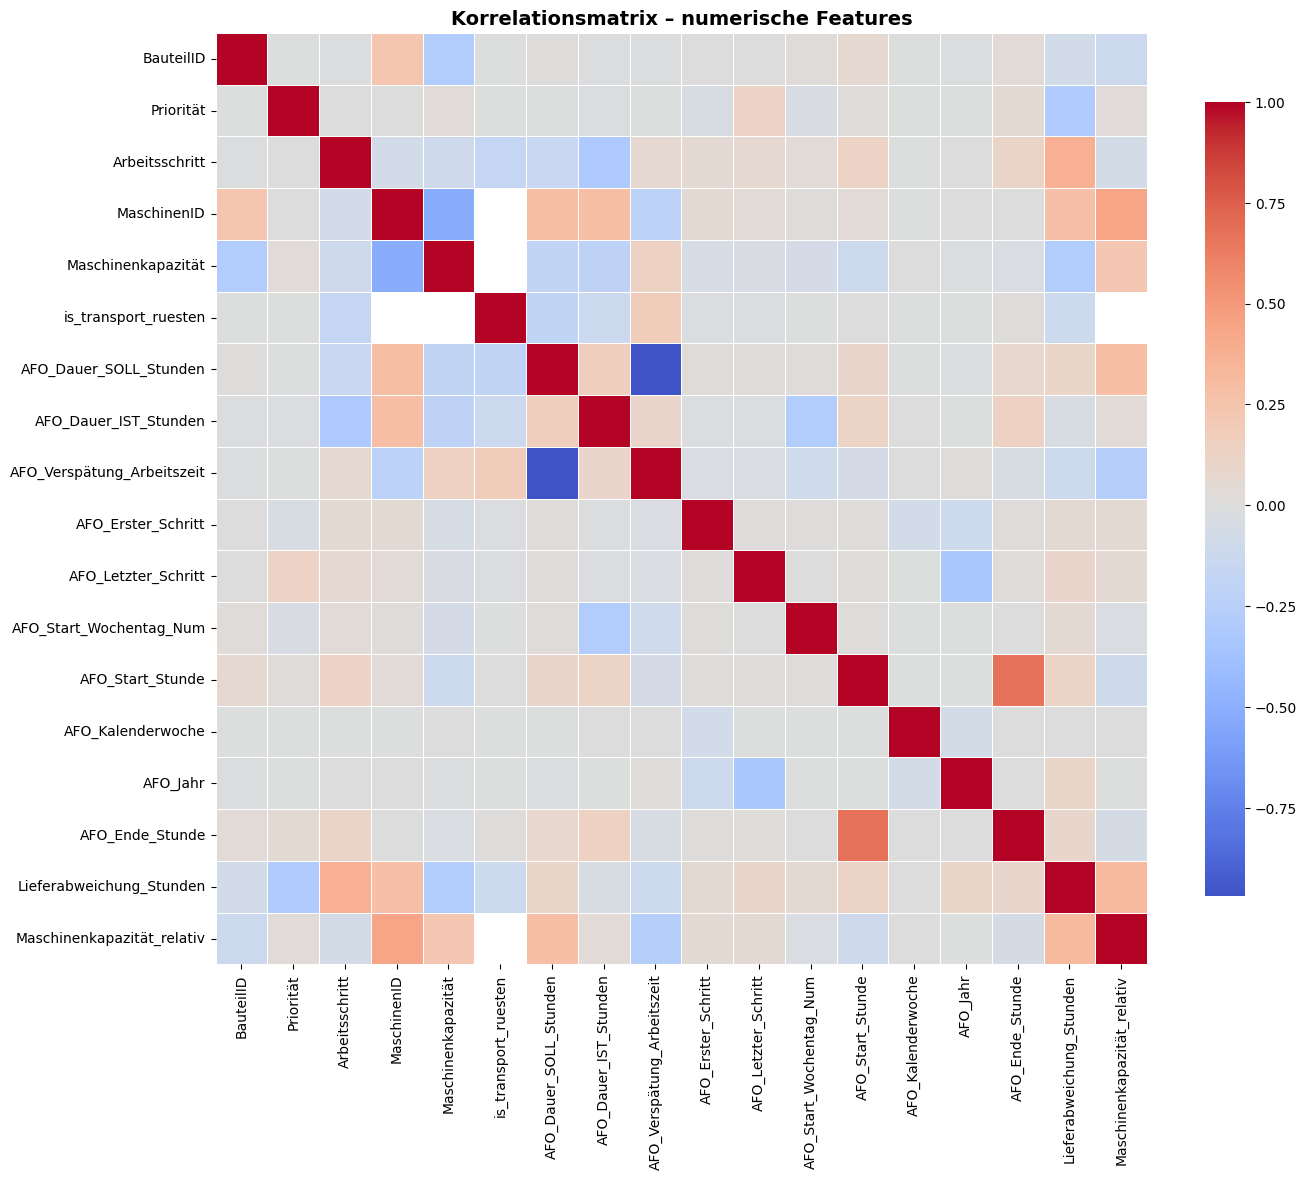

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 🧩 Korrelation berechnen
# ===============================

# Nur numerische Spalten (zur Sicherheit)
df_corr = df_cleaned.select_dtypes(include=["number", "bool"]).copy()

# Option: In bool → int konvertieren (sonst Farbe zu flach)
df_corr["is_transport_ruesten"] = df_corr["is_transport_ruesten"].astype(int)

# Korrelationsmatrix berechnen
corr_matrix = df_corr.corr(method="pearson")

# ===============================
# 🎯 Heatmap plotten
# ===============================
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Korrelationsmatrix – numerische Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



📊 Wichtigste Korrelationen mit Lieferabweichung_Stunden:
Lieferabweichung_Stunden      1.000000
Arbeitsschritt                0.374696
Maschinenkapazität_relativ    0.309704
MaschinenID                   0.272041
AFO_Start_Stunde              0.117897
AFO_Dauer_SOLL_Stunden        0.108891
AFO_Jahr                      0.101785
AFO_Letzter_Schritt           0.094379
AFO_Ende_Stunde               0.086124
AFO_Start_Wochentag_Num       0.056447
AFO_Erster_Schritt            0.053447
AFO_Kalenderwoche             0.007513
AFO_Dauer_IST_Stunden        -0.038260
BauteilID                    -0.076384
is_transport_ruesten         -0.108546
AFO_Verspätung_Arbeitszeit   -0.119836
Maschinenkapazität           -0.284041
Priorität                    -0.297421
Name: Lieferabweichung_Stunden, dtype: float64


/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/1681452924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


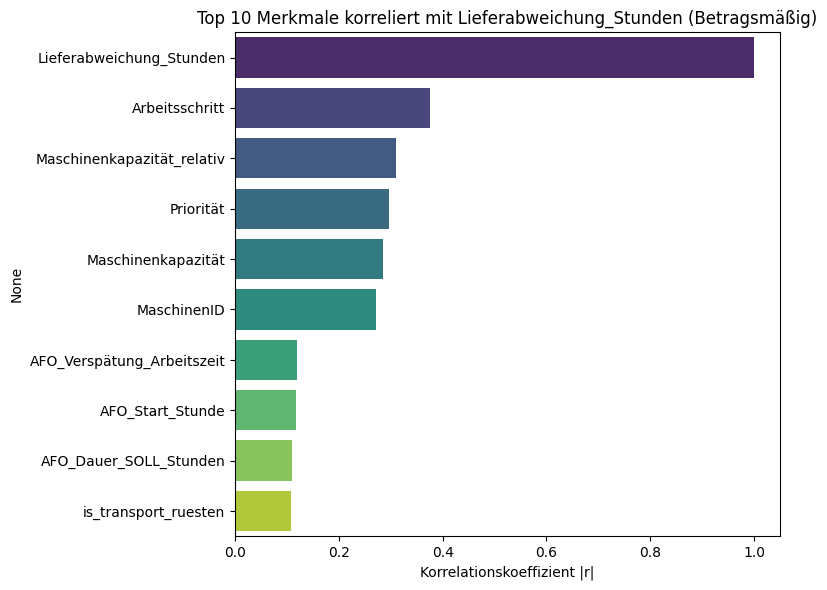

In [39]:
# Nur Korrelationen mit Zielvariable
target_corr = corr_matrix["Lieferabweichung_Stunden"].sort_values(ascending=False)

print("\n📊 Wichtigste Korrelationen mit Lieferabweichung_Stunden:")
print(target_corr)

# Plot der Top 10 positiven/negativen Korrelationen
plt.figure(figsize=(8,6))
sns.barplot(
    x=target_corr.abs().sort_values(ascending=False).head(10),
    y=target_corr.abs().sort_values(ascending=False).head(10).index,
    palette="viridis"
)
plt.title("Top 10 Merkmale korreliert mit Lieferabweichung_Stunden (Betragsmäßig)")
plt.xlabel("Korrelationskoeffizient |r|")
plt.tight_layout()
plt.show()


Top 20 Features für bivariate Analyse:
['Arbeitsschritt', 'Maschinenkapazität_relativ', 'Priorität', 'Maschinenkapazität', 'MaschinenID', 'AFO_Verspätung_Arbeitszeit', 'AFO_Start_Stunde', 'AFO_Dauer_SOLL_Stunden', 'is_transport_ruesten', 'AFO_Jahr', 'AFO_Letzter_Schritt', 'AFO_Ende_Stunde', 'BauteilID', 'AFO_Start_Wochentag_Num', 'AFO_Erster_Schritt', 'AFO_Dauer_IST_Stunden', 'AFO_Kalenderwoche']


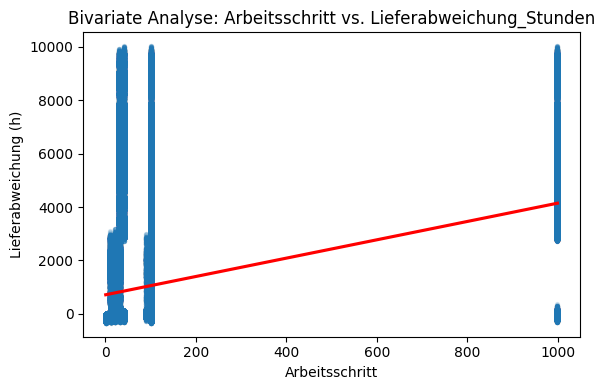

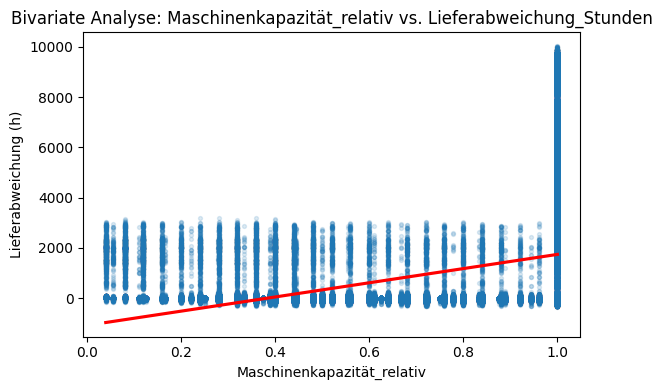

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


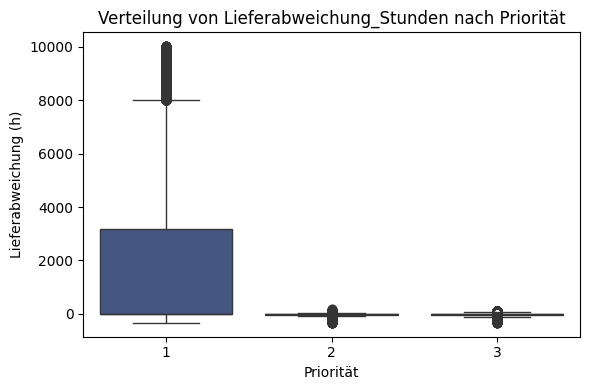

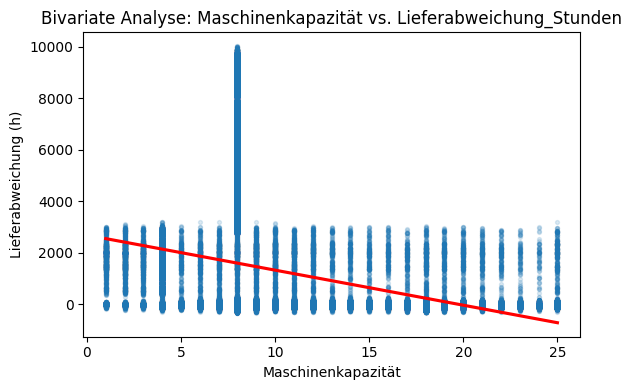

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


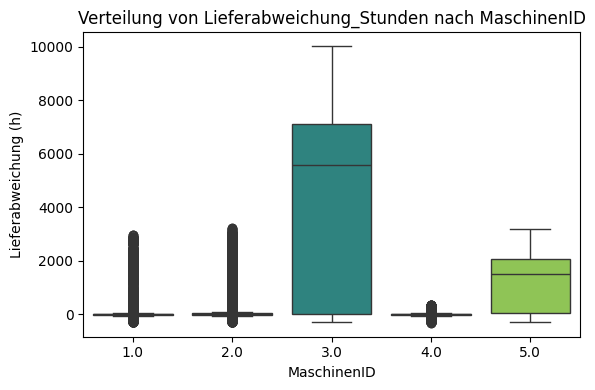

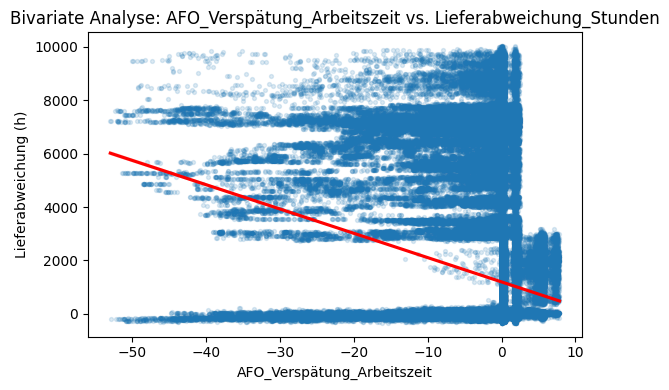

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


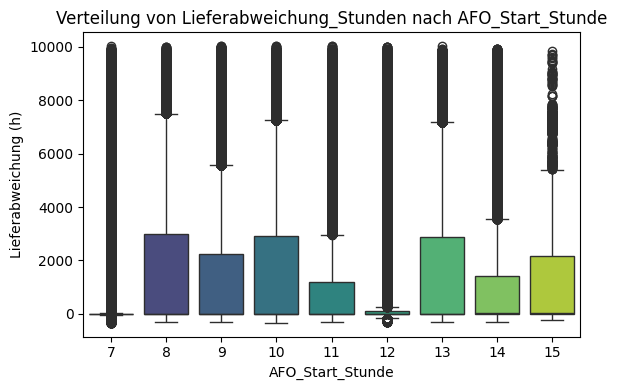

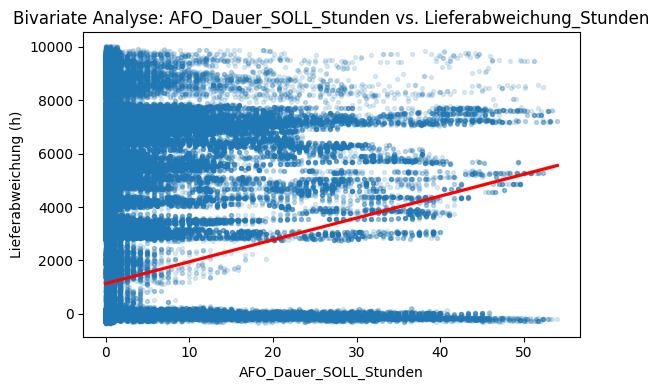

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


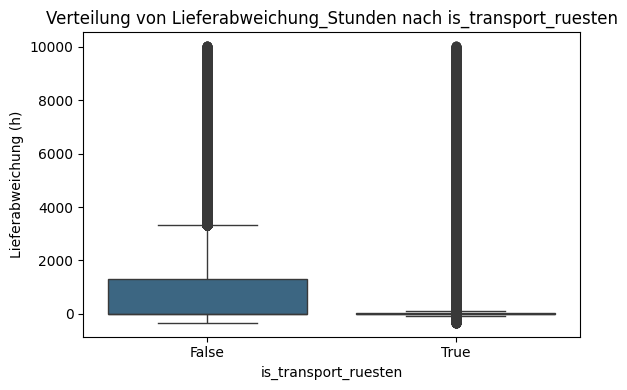

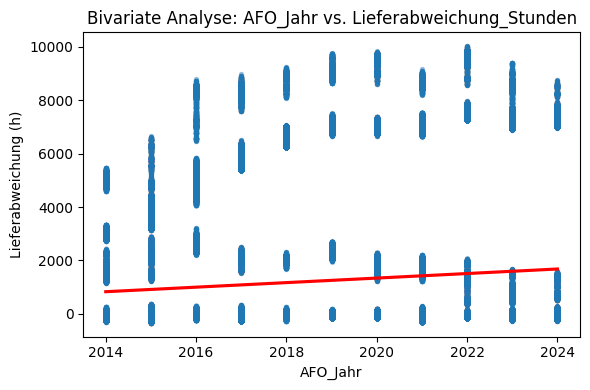

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


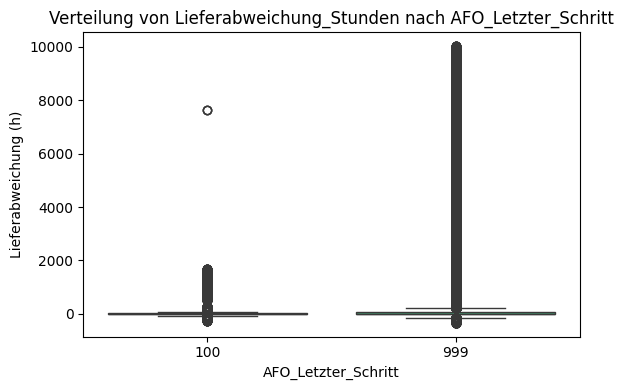

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


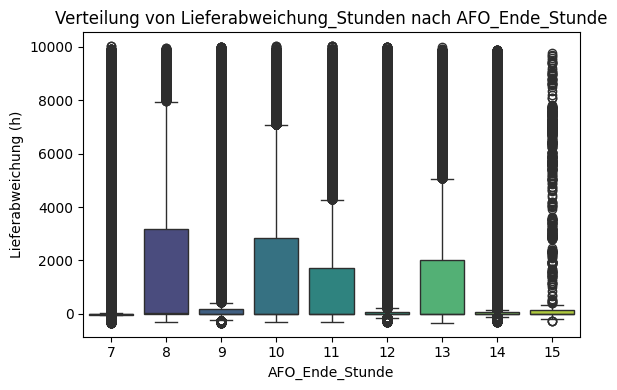

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


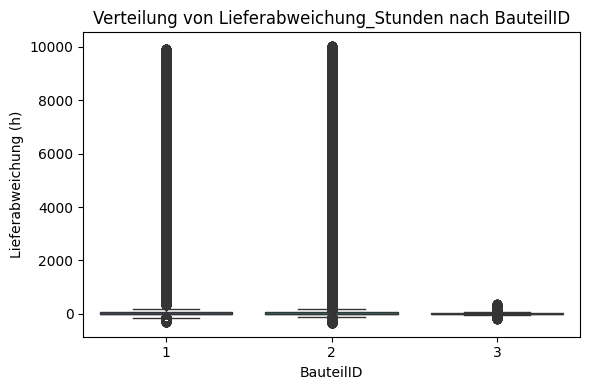

/var/folders/mc/jb1nbgjx243512nh0dbf14km0000gn/T/ipykernel_18329/310932386.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")


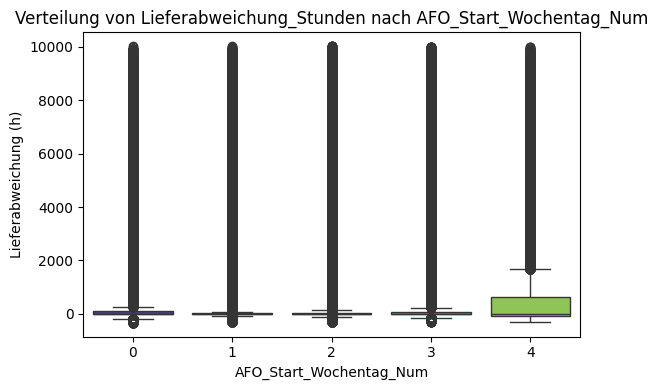

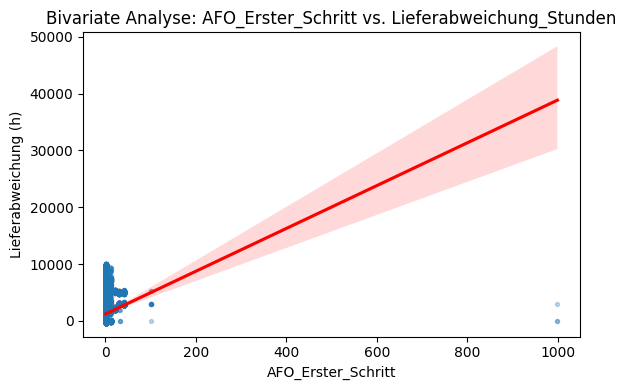

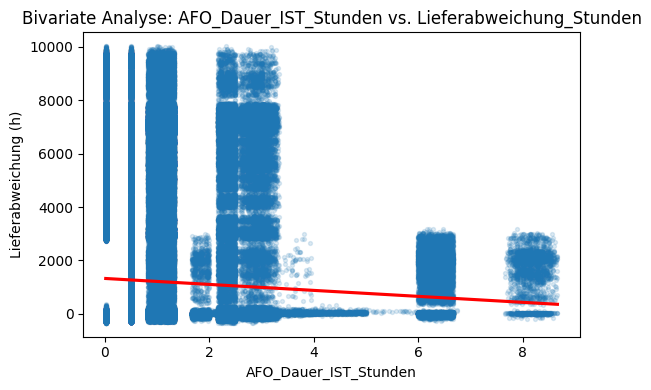

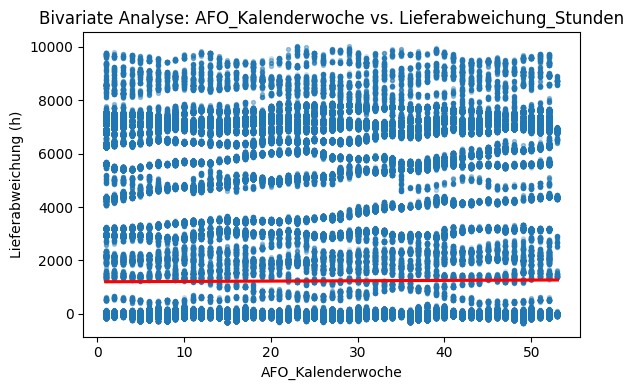

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 🎯 Zielvariable
# ===============================
target = "Lieferabweichung_Stunden"

# ===============================
# 📊 Top 20 korrelierte Features
# ===============================
corr_sorted = df_cleaned.corr(numeric_only=True)[target].abs().sort_values(ascending=False)
top_features = corr_sorted.drop(target).head(20).index.tolist()

print("Top 20 Features für bivariate Analyse:")
print(top_features)

# ===============================
# 🔍 Bivariate Analyse (automatisch)
# ===============================
for col in top_features:
    plt.figure(figsize=(6, 4))

    # Entscheide automatisch, ob Boxplot oder Scatter sinnvoll ist
    unique_vals = df_cleaned[col].nunique()

    # 🔹 Wenige Ausprägungen (z. B. bool, Kategorie) → Boxplot
    if unique_vals <= 10:
        sns.boxplot(data=df_cleaned, x=col, y=target, palette="viridis")
        plt.title(f"Verteilung von {target} nach {col}")
        plt.xlabel(col)
        plt.ylabel("Lieferabweichung (h)")

    # 🔸 Viele Ausprägungen → Scatter mit Regressionslinie
    else:
        sns.regplot(
            data=df_cleaned, x=col, y=target,
            scatter_kws={'alpha':0.15, 's':8},
            line_kws={"color":"red"},
            lowess=False  # lokale Glättung, fängt Nichtlinearität ein
        )
        plt.title(f"Bivariate Analyse: {col} vs. {target}")
        plt.xlabel(col)
        plt.ylabel("Lieferabweichung (h)")

    plt.tight_layout()
    plt.show()
